In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.drop('User ID', axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
df = pd.get_dummies(df, drop_first = True)

In [13]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [14]:
df.shape

(400, 4)

In [15]:
x = df.loc[:,['Age','EstimatedSalary','Gender_Male']].values
y = df.loc[:,['Purchased']].values

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()
X = sc.fit_transform(x)

In [19]:
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [20]:
Y=y.reshape(-1)

In [22]:
Y.shape

(400,)

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [29]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

In [30]:
acc_list

[0.92,
 0.89,
 0.92,
 0.92,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.92,
 0.92,
 0.91,
 0.92,
 0.9]

In [31]:
err_list

[0.07999999999999996,
 0.10999999999999999,
 0.07999999999999996,
 0.07999999999999996,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.07999999999999996,
 0.07999999999999996,
 0.08999999999999997,
 0.07999999999999996,
 0.09999999999999998]

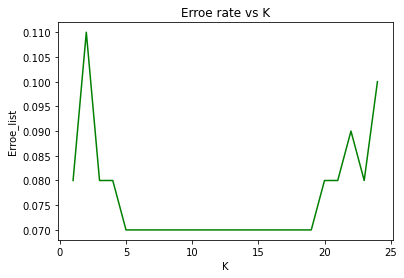

In [34]:
plt.plot(list(range(1,25)),err_list,c = 'g')
plt.title('Erroe rate vs K')
plt.xlabel('K')
plt.ylabel('Erroe_list')
plt.show()

In [36]:
model = KNeighborsClassifier(n_neighbors = 5)

In [37]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred = model.predict(x_test)

In [39]:
confusion_matrix(y_pred,y_test)

array([[64,  3],
       [ 4, 29]], dtype=int64)

In [40]:
accuracy_score(y_pred,y_test)

0.93